# Title

# Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

from scipy import stats
import seaborn as sns

In [2]:
TEST_NAMES = ['aes', 'float-operation', 'fuzzysearch', 'linear-equations', 'matmul', 'n-body', 'prime-numbers', 'user-manager', 'whatlang']

## Serial Execution

In [3]:
df_serial_execution_wasm = pd.DataFrame()
for test in TEST_NAMES:
    df_tmp = pd.read_csv(f'results/01-serial-execution/wasm/{test}-serial.csv')
    df_tmp['test_name'] = test
    df_tmp['batch'] = 'wasm'
    df_tmp[['response-time', 'status-code', 'test_name', 'batch']].to_csv(f'results/01-serial-execution/wasm/{test}-serial.2.csv', index=False)
    df_serial_execution_wasm = df_serial_execution_wasm.append(df_tmp)

In [4]:
df_serial_execution_openfaas = pd.DataFrame()
for test in TEST_NAMES:
    df_tmp = pd.read_csv(f'results/01-serial-execution/openfaas/{test}-serial.csv')
    df_tmp['test_name'] = test
    df_tmp['batch'] = 'openfaas'
    df_tmp[['response-time', 'status-code', 'test_name', 'batch']].to_csv(f'results/01-serial-execution/openfaas/{test}-serial.2.csv', index=False)
    df_serial_execution_openfaas = df_serial_execution_openfaas.append(df_tmp)

In [5]:
df_serial_all = pd.DataFrame()
df_serial_all = df_serial_all.append(df_serial_execution_wasm)
df_serial_all = df_serial_all.append(df_serial_execution_openfaas)

Increasing the default number of shown records to aid data exploration.

In [6]:
pd.set_option('display.max_rows', 250)

Mean execution time per test. Execution method: 5 minutes continuous serial execution with 1 thread.

In [7]:
df_serial_execution_wasm[['response-time', 'test_name']].groupby(['test_name']).mean()

,response-time
test_name,
aes,0.060339
float-operation,0.039665
fuzzysearch,0.133080
linear-equations,0.049743
matmul,0.057386
n-body,0.040326
prime-numbers,0.039701
user-manager,0.079771
whatlang,0.040458


In [8]:
df_serial_execution_openfaas[['response-time', 'test_name']].groupby(['test_name']).mean()

,response-time
test_name,
aes,0.051720
float-operation,0.040374
fuzzysearch,0.140380
linear-equations,0.043144
matmul,0.044963
n-body,0.039555
prime-numbers,0.039586
user-manager,0.081144
whatlang,0.039824


In [9]:
alpha = 0.05
for test in TEST_NAMES:
    tmp_df_serial_execution_wasm = df_serial_execution_wasm[(df_serial_execution_wasm.test_name == test)]['response-time']
    tmp_df_serial_execution_openfaas = df_serial_execution_openfaas[(df_serial_execution_openfaas.test_name == test)]['response-time']
    statistic, pvalue = stats.mannwhitneyu(tmp_df_serial_execution_wasm, tmp_df_serial_execution_openfaas, alternative='two-sided')
    if pvalue > alpha:
        print(f'[{test}] Fail to reject H0 - same distribution (statistic={statistic})(p={pvalue})')
    else:
        print(f'[{test}] Reject H0 - different distribution (statistic={statistic})(p={pvalue})')

[aes] Reject H0 - different distribution (statistic=26628696.5)(p=0.0)
[float-operation] Reject H0 - different distribution (statistic=16308374.5)(p=0.0)
[fuzzysearch] Reject H0 - different distribution (statistic=3390462.5)(p=5.809194615770731e-134)
[linear-equations] Reject H0 - different distribution (statistic=38467115.5)(p=0.0)
[matmul] Reject H0 - different distribution (statistic=33149937.5)(p=0.0)
[n-body] Reject H0 - different distribution (statistic=25800755.0)(p=1.2706416164523645e-19)
[prime-numbers] Reject H0 - different distribution (statistic=23785655.0)(p=8.902459150825748e-73)
[user-manager] Reject H0 - different distribution (statistic=6130469.5)(p=9.508721668008067e-19)
[whatlang] Reject H0 - different distribution (statistic=24710750.0)(p=3.0010271055968304e-34)


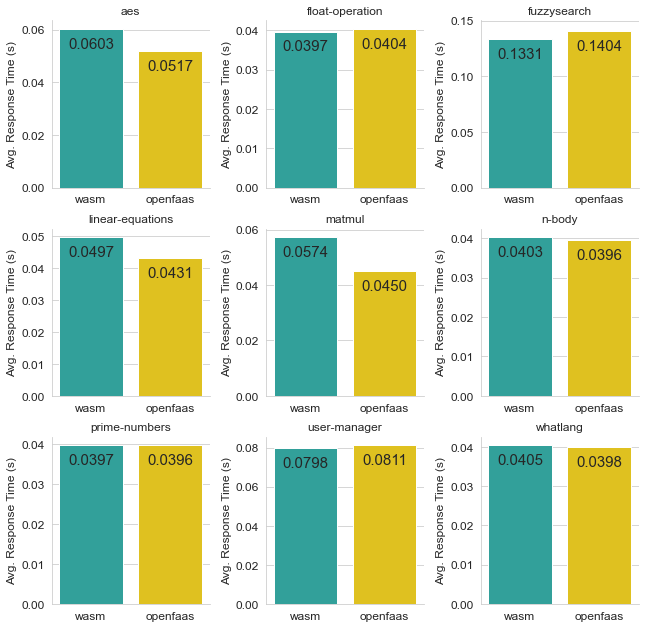

In [10]:
serial_execution_avg_bar_plot = sns.FacetGrid(df_serial_all, col="test_name", hue='batch', col_wrap=3, sharey=False, palette=['lightseagreen', 'gold', 'darkorange'],
                                              sharex=False)
serial_execution_avg_bar_plot = serial_execution_avg_bar_plot.map(sns.barplot, 'batch', 'response-time',
                                                                  order=['wasm', 'openfaas'], errwidth=0)
serial_execution_avg_bar_plot.set_titles('{col_name}', size=12)
serial_execution_avg_bar_plot.fig.tight_layout(w_pad=3)
for ax in serial_execution_avg_bar_plot.axes.ravel():
    ax.set_ylabel('Avg. Response Time (s)', fontsize=12)
    ax.set_xlabel('')
    ax.tick_params(labelsize=12)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                    va='center', xytext=(0, -15), textcoords='offset points', fontsize=15)
plt.show()

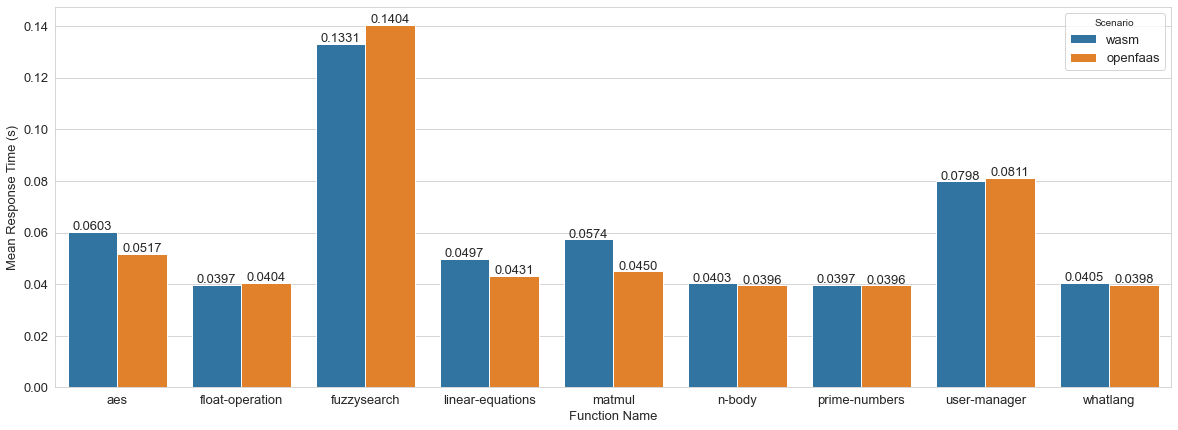

In [11]:
fig = plt.figure(figsize=(20,7))
pl1 = sns.barplot(data=df_serial_all, y="response-time", x="test_name", hue='batch',errorbar=None)
pl1.set_xlabel('Function Name', fontsize=13)
pl1.set_ylabel('Mean Response Time (s)', fontsize=13)
pl1.tick_params(labelsize=13)
pl1.legend(title='Scenario', fontsize=13)

for ax in pl1.patches:
    pl1.annotate(format(ax.get_height(), '.4f'), (ax.get_x() + ax.get_width() / 2., ax.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize=13)

fig = pl1.get_figure()
fig.savefig('images/01-serial-execution.png', bbox_inches='tight', dpi=300)

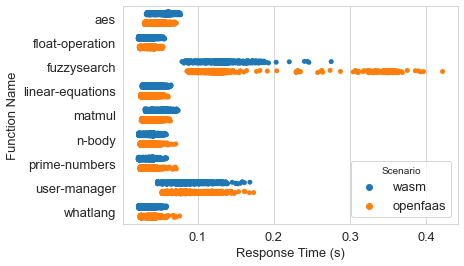

In [12]:
bplot1 = sns.stripplot(data=df_serial_all, y='test_name', x='response-time', hue='batch', dodge=True, jitter=True)
bplot1.set_xlabel('Response Time (s)', fontsize=13)
bplot1.set_ylabel('Function Name', fontsize=13)
bplot1.tick_params(labelsize=13)
bplot1.legend(title='Scenario', fontsize=13, loc='lower right')

fig = bplot1.get_figure()
fig.savefig('images/02-serial-execution-stripplot.png', bbox_inches='tight', dpi=300)

In [13]:
for test in TEST_NAMES:
        tmp_std_wasm = df_serial_all[(df_serial_all.test_name == test) & (df_serial_all.batch=='wasm')]['response-time'].std()
        tmp_std_openfaas = df_serial_all[(df_serial_all.test_name == test) & (df_serial_all.batch=='openfaas')]['response-time'].std()
        tmp_coefvar_wasm = stats.variation(df_serial_all[(df_serial_all.test_name == test) & (df_serial_all.batch=='wasm')]['response-time'])
        tmp_coefvar_openfaas = stats.variation(df_serial_all[(df_serial_all.test_name == test) & (df_serial_all.batch=='openfaas')]['response-time'])
        print(f'STD - [{test}] wasm < openfaas: {tmp_std_wasm<tmp_std_openfaas}, {round(tmp_std_wasm,4)}<{round(tmp_std_openfaas,4)}')
        print(f'COEF VAR - [{test}] wasm < openfaas: {tmp_coefvar_wasm<tmp_coefvar_openfaas}, {round(tmp_coefvar_wasm,4)}<{round(tmp_coefvar_openfaas,4)}')

STD - [aes] wasm < openfaas: True, 0.0055<0.0068
COEF VAR - [aes] wasm < openfaas: True, 0.0907<0.1312
STD - [float-operation] wasm < openfaas: True, 0.0045<0.0052
COEF VAR - [float-operation] wasm < openfaas: True, 0.1124<0.1286
STD - [fuzzysearch] wasm < openfaas: True, 0.0137<0.0606
COEF VAR - [fuzzysearch] wasm < openfaas: True, 0.1029<0.4317
STD - [linear-equations] wasm < openfaas: True, 0.0047<0.0054
COEF VAR - [linear-equations] wasm < openfaas: True, 0.0935<0.1253
STD - [matmul] wasm < openfaas: True, 0.0051<0.0057
COEF VAR - [matmul] wasm < openfaas: True, 0.0885<0.126
STD - [n-body] wasm < openfaas: True, 0.0044<0.0057
COEF VAR - [n-body] wasm < openfaas: True, 0.1093<0.1451
STD - [prime-numbers] wasm < openfaas: True, 0.0044<0.0058
COEF VAR - [prime-numbers] wasm < openfaas: True, 0.1099<0.1463
STD - [user-manager] wasm < openfaas: True, 0.0121<0.0131
COEF VAR - [user-manager] wasm < openfaas: True, 0.1522<0.1608
STD - [whatlang] wasm < openfaas: True, 0.0044<0.0059
COEF VA

## Function Deployment

In [14]:
df_function_deployment_wasm = pd.DataFrame()
for test in TEST_NAMES:
    df_tmp = pd.read_csv(f'results/02-function-deployment/wasm/{test}-function-deployment.csv')
    df_tmp['test_name'] = test
    df_tmp['batch'] = 'wasm'
    df_function_deployment_wasm = df_function_deployment_wasm.append(df_tmp)

In [15]:
df_function_deployment_wasm[['response-time', 'test_name']].groupby(['test_name']).mean()

,response-time
test_name,
aes,0.065401
float-operation,0.043875
fuzzysearch,0.139215
linear-equations,0.053653
matmul,0.060347
n-body,0.044850
prime-numbers,0.044489
user-manager,0.086078
whatlang,0.045023


In [16]:
df_function_deployment_openfaas = pd.DataFrame()
for test in TEST_NAMES:
    df_tmp = pd.read_csv(f'results/02-function-deployment/openfaas/{test}-function-deployment.csv')
    df_tmp['test_name'] = test
    df_tmp['batch'] = 'openfaas'
    df_function_deployment_openfaas = df_function_deployment_openfaas.append(df_tmp)

In [17]:
df_function_deployment_openfaas[['response-time', 'test_name']].groupby(['test_name']).mean()

,response-time
test_name,
aes,0.057986
float-operation,0.045617
fuzzysearch,0.158531
linear-equations,0.047512
matmul,0.050042
n-body,0.046069
prime-numbers,0.044987
user-manager,0.102953
whatlang,0.046806


In [18]:
df_function_deployment_all = pd.DataFrame()
df_function_deployment_all = df_function_deployment_all.append(df_function_deployment_wasm)
df_function_deployment_all = df_function_deployment_all.append(df_function_deployment_openfaas)

In [19]:
alpha = 0.05
for test in TEST_NAMES:
    tmp_df_function_deployment_wasm = df_function_deployment_wasm[(df_function_deployment_wasm.test_name == test)]['response-time']
    tmp_df_function_deployment_openfaas = df_function_deployment_openfaas[(df_function_deployment_openfaas.test_name == test)]['response-time']
    statistic, pvalue = stats.mannwhitneyu(tmp_df_function_deployment_wasm, tmp_df_function_deployment_openfaas, alternative='two-sided')
    if pvalue > alpha:
        print(f'[{test}] Fail to reject H0 - same distribution (statistic={statistic})(p={pvalue})')
    else:
        print(f'[{test}] Reject H0 - different distribution (statistic={statistic})(p={pvalue})')

[aes] Reject H0 - different distribution (statistic=9405.0)(p=5.149158336225075e-27)
[float-operation] Reject H0 - different distribution (statistic=458.5)(p=1.2020207563992526e-28)
[fuzzysearch] Reject H0 - different distribution (statistic=6547.5)(p=0.00015679496260940213)
[linear-equations] Reject H0 - different distribution (statistic=9505.5)(p=3.3196357068138327e-28)
[matmul] Reject H0 - different distribution (statistic=9218.0)(p=6.460440067057895e-25)
[n-body] Reject H0 - different distribution (statistic=995.5)(p=1.2362155157567686e-22)
[prime-numbers] Reject H0 - different distribution (statistic=2003.5)(p=2.373773301547935e-13)
[user-manager] Reject H0 - different distribution (statistic=3158.5)(p=6.845090683737402e-06)
[whatlang] Reject H0 - different distribution (statistic=598.0)(p=4.986159795339925e-27)


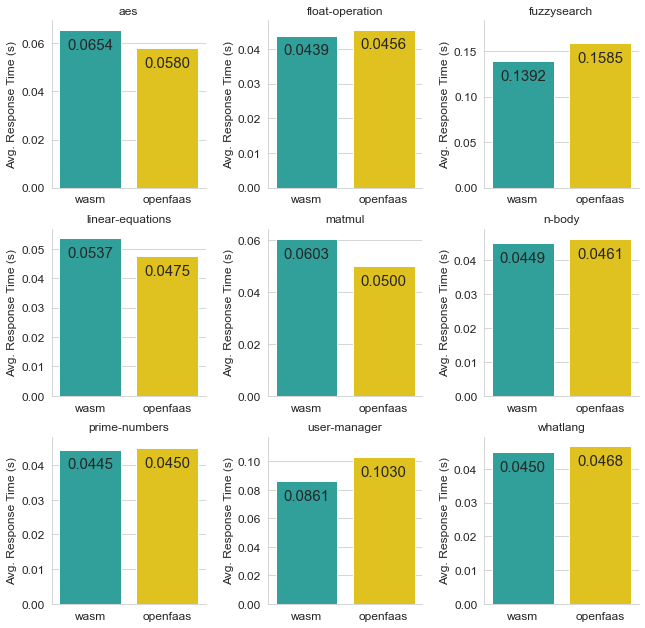

In [20]:
function_deployment_avg_bar_plot = sns.FacetGrid(df_function_deployment_all, col="test_name", hue='batch', col_wrap=3, sharey=False, palette=['lightseagreen', 'gold', 'darkorange'],
                                              sharex=False)
function_deployment_avg_bar_plot = function_deployment_avg_bar_plot.map(sns.barplot, 'batch', 'response-time',
                                                                  order=['wasm', 'openfaas'], errwidth=0)
function_deployment_avg_bar_plot.set_titles('{col_name}', size=12)
function_deployment_avg_bar_plot.fig.tight_layout(w_pad=3)
for ax in function_deployment_avg_bar_plot.axes.ravel():
    ax.set_ylabel('Avg. Response Time (s)', fontsize=12)
    ax.set_xlabel('')
    ax.tick_params(labelsize=12)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                    va='center', xytext=(0, -15), textcoords='offset points', fontsize=15)
plt.show()

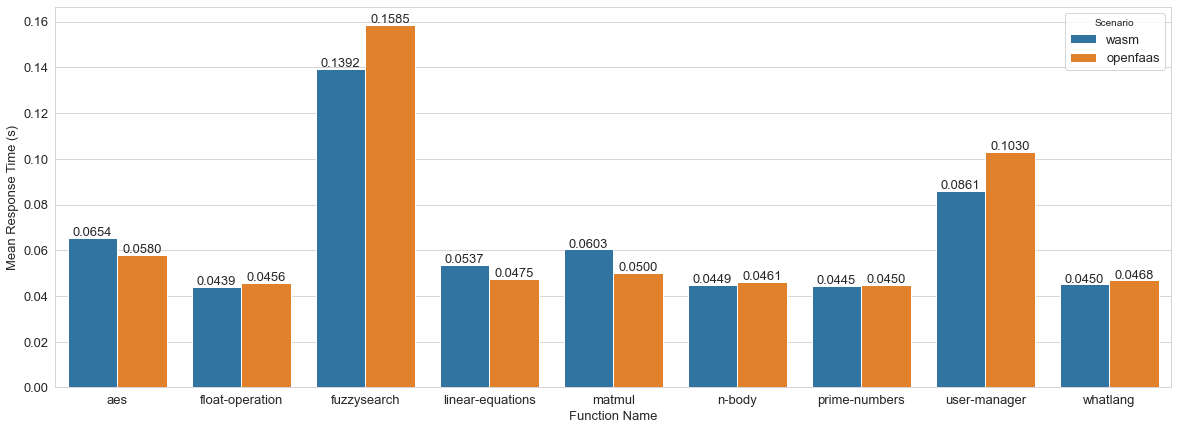

In [21]:
fig = plt.figure(figsize=(20,7))
pl2 = sns.barplot(data=df_function_deployment_all, y="response-time", x="test_name", hue='batch',errorbar=None)

pl2.set_xlabel('Function Name', fontsize=13)
pl2.set_ylabel('Mean Response Time (s)', fontsize=13)
pl2.tick_params(labelsize=13)
pl2.legend(title='Scenario', fontsize=13)

for ax in pl2.patches:
    pl2.annotate(format(ax.get_height(), '.4f'), (ax.get_x() + ax.get_width() / 2., ax.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize=13)

fig = pl2.get_figure()
fig.savefig('images/04-first-exec-after-instantiation.png', bbox_inches='tight', dpi=300)

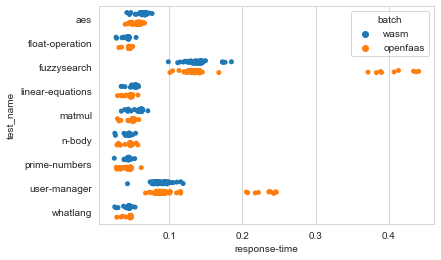

In [22]:
bplot2 = sns.stripplot(data=df_function_deployment_all, y='test_name', x='response-time', hue='batch', dodge=True, jitter=True)

In [23]:
for test in TEST_NAMES:
    tmp_std_wasm = df_function_deployment_all[(df_function_deployment_all.test_name == test) & (df_function_deployment_all.batch=='wasm')]['response-time'].std()
    tmp_std_openfaas = df_function_deployment_all[(df_function_deployment_all.test_name == test) & (df_function_deployment_all.batch=='openfaas')]['response-time'].std()
    print(f'STD - [{test}] wasm < openfaas: {tmp_std_wasm<tmp_std_openfaas}, {round(tmp_std_wasm,4)}<{round(tmp_std_openfaas,4)}')

STD - [aes] wasm < openfaas: False, 0.0046<0.0039
STD - [float-operation] wasm < openfaas: False, 0.003<0.002
STD - [fuzzysearch] wasm < openfaas: True, 0.0109<0.0792
STD - [linear-equations] wasm < openfaas: True, 0.0033<0.0034
STD - [matmul] wasm < openfaas: False, 0.0057<0.0036
STD - [n-body] wasm < openfaas: True, 0.003<0.0045
STD - [prime-numbers] wasm < openfaas: True, 0.0024<0.0053
STD - [user-manager] wasm < openfaas: True, 0.009<0.0433
STD - [whatlang] wasm < openfaas: False, 0.0034<0.0026


## Concurrent Execution

Execution method: 1 minute continuous execution by 5 threads, each thread limited to 5 requests per second (max 25 requests per second for 1 minute, total 1500 requests).

In [24]:
df_concurrent_execution_wasm = pd.DataFrame()
for test in TEST_NAMES:
    df_tmp = pd.read_csv(f'results/03-concurrent-execution/wasm/{test}-concurrent-execution.csv')
    df_tmp['test_name'] = test
    df_tmp['batch'] = 'wasm'
    df_concurrent_execution_wasm = df_concurrent_execution_wasm.append(df_tmp)

In [25]:
df_concurrent_execution_wasm[['response-time', 'test_name']].groupby(['test_name']).mean()

,response-time
test_name,
aes,0.089552
float-operation,0.057646
fuzzysearch,0.173190
linear-equations,0.075751
matmul,0.084573
n-body,0.059799
prime-numbers,0.058973
user-manager,0.109828
whatlang,0.060627


In [26]:
df_concurrent_execution_openfaas = pd.DataFrame()
for test in TEST_NAMES:
    df_tmp = pd.read_csv(f'results/03-concurrent-execution/openfaas/{test}-concurrent-execution.csv')
    df_tmp['test_name'] = test
    df_tmp['batch'] = 'openfaas'
    df_concurrent_execution_openfaas = df_concurrent_execution_openfaas.append(df_tmp)

In [27]:
df_concurrent_execution_openfaas[['response-time', 'test_name']].groupby(['test_name']).mean()

,response-time
test_name,
aes,0.075438
float-operation,0.059707
fuzzysearch,0.150366
linear-equations,0.062971
matmul,0.064965
n-body,0.060582
prime-numbers,0.060342
user-manager,0.098594
whatlang,0.061219


In [28]:
df_concurrent_execution_all = pd.DataFrame()
df_concurrent_execution_all = df_concurrent_execution_all.append(df_concurrent_execution_wasm)
df_concurrent_execution_all = df_concurrent_execution_all.append(df_concurrent_execution_openfaas)

In [29]:
alpha = 0.05
for test in TEST_NAMES:
    tmp_df_concurrent_execution_wasm = df_concurrent_execution_wasm[(df_concurrent_execution_wasm.test_name == test)]['response-time']
    tmp_df_concurrent_execution_openfaas = df_concurrent_execution_openfaas[(df_concurrent_execution_openfaas.test_name == test)]['response-time']
    statistic, pvalue = stats.mannwhitneyu(tmp_df_concurrent_execution_wasm, tmp_df_concurrent_execution_openfaas, alternative='two-sided')
    if pvalue > alpha:
        print(f'[{test}] Fail to reject H0 - same distribution (statistic={statistic})(p={pvalue})')
    else:
        print(f'[{test}] Reject H0 - different distribution (statistic={statistic})(p={pvalue})')

[aes] Reject H0 - different distribution (statistic=1485236.0)(p=4.354841297640593e-52)
[float-operation] Reject H0 - different distribution (statistic=1038289.5)(p=0.00025676425400230675)
[fuzzysearch] Reject H0 - different distribution (statistic=1803711.0)(p=3.3398060714881944e-194)
[linear-equations] Reject H0 - different distribution (statistic=1495080.0)(p=7.126738794658563e-55)
[matmul] Reject H0 - different distribution (statistic=1659667.5)(p=1.6899840930687638e-112)
[n-body] Fail to reject H0 - same distribution (statistic=1096528.5)(p=0.23004371160932224)
[prime-numbers] Reject H0 - different distribution (statistic=1059242.0)(p=0.005569135817262153)
[user-manager] Reject H0 - different distribution (statistic=1460824.0)(p=1.6852214935826602e-45)
[whatlang] Fail to reject H0 - same distribution (statistic=1097809.0)(p=0.25168595924105397)


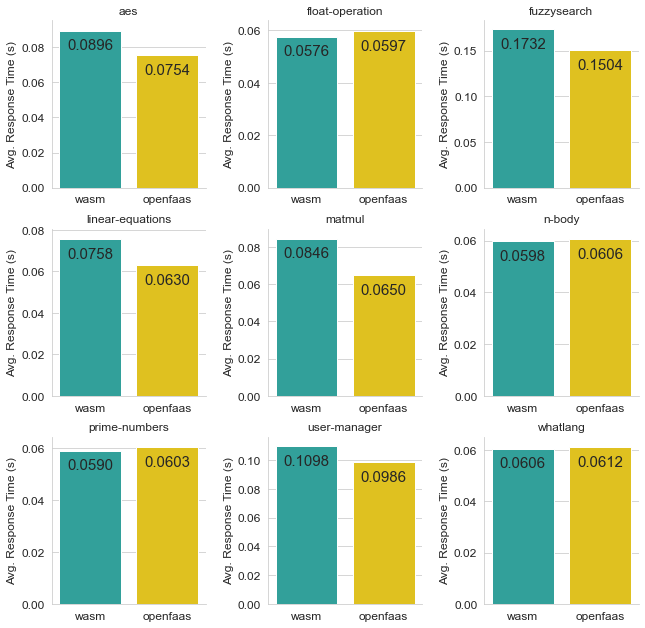

In [30]:
concurrent_execution_avg_bar_plot = sns.FacetGrid(df_concurrent_execution_all, col="test_name", hue='batch', col_wrap=3, sharey=False, palette=['lightseagreen', 'gold', 'darkorange'],
                                                 sharex=False)
concurrent_execution_avg_bar_plot = concurrent_execution_avg_bar_plot.map(sns.barplot, 'batch', 'response-time',
                                                                        order=['wasm', 'openfaas'], errwidth=0)
concurrent_execution_avg_bar_plot.set_titles('{col_name}', size=12)
concurrent_execution_avg_bar_plot.fig.tight_layout(w_pad=3)
for ax in concurrent_execution_avg_bar_plot.axes.ravel():
    ax.set_ylabel('Avg. Response Time (s)', fontsize=12)
    ax.set_xlabel('')
    ax.tick_params(labelsize=12)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                    va='center', xytext=(0, -15), textcoords='offset points', fontsize=15)
plt.show()

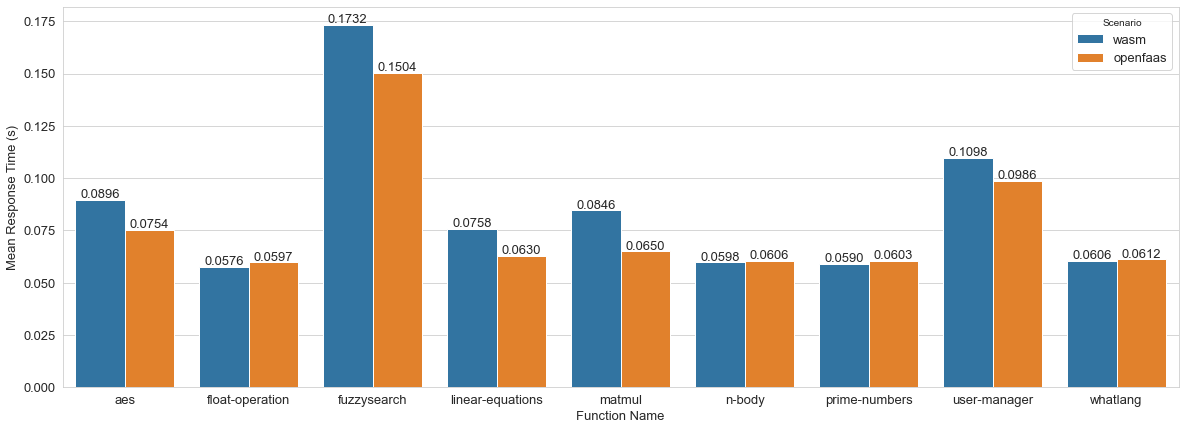

In [31]:
fig = plt.figure(figsize=(20,7))
pl3 = sns.barplot(data=df_concurrent_execution_all, y="response-time", x="test_name", hue='batch',errorbar=None)

pl3.set_xlabel('Function Name', fontsize=13)
pl3.set_ylabel('Mean Response Time (s)', fontsize=13)
pl3.tick_params(labelsize=13)
pl3.legend(title='Scenario', fontsize=13)

for ax in pl3.patches:
    pl3.annotate(format(ax.get_height(), '.4f'), (ax.get_x() + ax.get_width() / 2., ax.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize=13)

fig = pl3.get_figure()
fig.savefig('images/05-concurrent-execution.png', bbox_inches='tight', dpi=300)

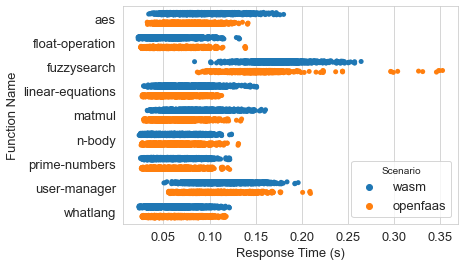

In [32]:
bplot3 = sns.stripplot(data=df_concurrent_execution_all, y='test_name', x='response-time', hue='batch', dodge=True, jitter=True)

bplot3.set_xlabel('Response Time (s)', fontsize=13)
bplot3.set_ylabel('Function Name', fontsize=13)
bplot3.tick_params(labelsize=13)
bplot3.legend(title='Scenario', fontsize=13, loc='lower right')

fig = bplot3.get_figure()
fig.savefig('images/06-concurrent-execution-stripplot.png', bbox_inches='tight', dpi=300)

In [33]:
for test in TEST_NAMES:
    tmp_std_wasm = df_concurrent_execution_all[(df_concurrent_execution_all.test_name == test) & (df_concurrent_execution_all.batch=='wasm')]['response-time'].std()
    tmp_std_openfaas = df_concurrent_execution_all[(df_concurrent_execution_all.test_name == test) & (df_concurrent_execution_all.batch=='openfaas')]['response-time'].std()
    tmp_coefvar_wasm = stats.variation(df_concurrent_execution_all[(df_concurrent_execution_all.test_name == test) & (df_concurrent_execution_all.batch=='wasm')]['response-time'])
    tmp_coefvar_openfaas = stats.variation(df_concurrent_execution_all[(df_concurrent_execution_all.test_name == test) & (df_concurrent_execution_all.batch=='openfaas')]['response-time'])
    print(f'STD - [{test}] wasm < openfaas: {tmp_std_wasm<tmp_std_openfaas}, {round(tmp_std_wasm,4)}<{round(tmp_std_openfaas,4)}')
    print(f'COEF VAR - [{test}] wasm < openfaas: {tmp_coefvar_wasm<tmp_coefvar_openfaas}, {round(tmp_coefvar_wasm,4)}<{round(tmp_coefvar_openfaas,4)}')

STD - [aes] wasm < openfaas: False, 0.0253<0.0205
COEF VAR - [aes] wasm < openfaas: False, 0.2828<0.2711
STD - [float-operation] wasm < openfaas: False, 0.0201<0.02
COEF VAR - [float-operation] wasm < openfaas: False, 0.3481<0.3356
STD - [fuzzysearch] wasm < openfaas: False, 0.0231<0.0227
COEF VAR - [fuzzysearch] wasm < openfaas: True, 0.1336<0.1506
STD - [linear-equations] wasm < openfaas: False, 0.0221<0.0195
COEF VAR - [linear-equations] wasm < openfaas: True, 0.2923<0.3097
STD - [matmul] wasm < openfaas: False, 0.0235<0.0195
COEF VAR - [matmul] wasm < openfaas: True, 0.2777<0.3004
STD - [n-body] wasm < openfaas: False, 0.02<0.0199
COEF VAR - [n-body] wasm < openfaas: False, 0.3347<0.3277
STD - [prime-numbers] wasm < openfaas: False, 0.0193<0.0187
COEF VAR - [prime-numbers] wasm < openfaas: False, 0.3279<0.3102
STD - [user-manager] wasm < openfaas: False, 0.0233<0.023
COEF VAR - [user-manager] wasm < openfaas: True, 0.212<0.2334
STD - [whatlang] wasm < openfaas: False, 0.0203<0.0193

## Function Instantiation Time


In [34]:
df_deployment_time_wasm = pd.read_csv(f'results/04-deployment_time/wasm-deployment-time.csv')
df_deployment_time_wasm['test_name'] = df_deployment_time_wasm['test_name'].str.replace('-v2','')
df_deployment_time_wasm['test_name'] = df_deployment_time_wasm['test_name'].str.replace('prime-nubmers','prime-numbers')
df_deployment_time_wasm['batch'] = 'wasm'

df_deployment_time_openfaas = pd.read_csv(f'results/04-deployment_time/openfaas-deployment-time.csv')
df_deployment_time_openfaas['test_name'] = df_deployment_time_openfaas['test_name'].str.replace('openfaas_','')
df_deployment_time_openfaas['batch'] = 'openfaas'

In [35]:
print(df_deployment_time_wasm[['init_time', 'test_name']].groupby(['test_name']).mean())
print(df_deployment_time_openfaas[['init_time', 'test_name']].groupby(['test_name']).mean())

                  init_time
test_name                  
aes                0.821573
float-operation    0.822090
fuzzysearch        0.820731
linear-equations   0.826257
matmul             0.829293
n-body             0.838560
prime-numbers      0.844348
user-manager       0.805018
whatlang           0.807599
                  init_time
test_name                  
aes                1.720080
float-operation    1.720941
fuzzysearch        1.740885
linear-equations   1.712103
matmul             1.703101
n-body             1.726589
prime-numbers      1.718779
user-manager       1.716019
whatlang           1.734669


In [36]:
df_deployment_time_all = pd.DataFrame()
df_deployment_time_all = df_deployment_time_all.append(df_deployment_time_wasm)
df_deployment_time_all = df_deployment_time_all.append(df_deployment_time_openfaas)

In [37]:
alpha = 0.05
for test in TEST_NAMES:
    tmp_df_deployment_time_wasm = df_deployment_time_wasm[(df_deployment_time_wasm.test_name == test)]['init_time']
    tmp_df_deployment_time_openfaas = df_deployment_time_openfaas[(df_deployment_time_openfaas.test_name == test)]['init_time']
    statistic, pvalue = stats.mannwhitneyu(tmp_df_deployment_time_wasm, tmp_df_deployment_time_openfaas, alternative='two-sided')
    if pvalue > alpha:
        print(f'[{test}] Fail to reject H0 - same distribution (statistic={statistic})(p={pvalue})')
    else:
        print(f'[{test}] Reject H0 - different distribution (statistic={statistic})(p={pvalue})')

[aes] Reject H0 - different distribution (statistic=0.0)(p=2.562143669163401e-34)
[float-operation] Reject H0 - different distribution (statistic=0.0)(p=2.562143669163401e-34)
[fuzzysearch] Reject H0 - different distribution (statistic=0.0)(p=2.562143669163401e-34)
[linear-equations] Reject H0 - different distribution (statistic=97.0)(p=4.593944365706229e-33)
[matmul] Reject H0 - different distribution (statistic=0.0)(p=2.562143669163401e-34)
[n-body] Reject H0 - different distribution (statistic=196.0)(p=8.253309289703273e-32)
[prime-numbers] Reject H0 - different distribution (statistic=0.0)(p=2.562143669163401e-34)
[user-manager] Reject H0 - different distribution (statistic=0.0)(p=2.562143669163401e-34)
[whatlang] Reject H0 - different distribution (statistic=0.0)(p=2.562143669163401e-34)


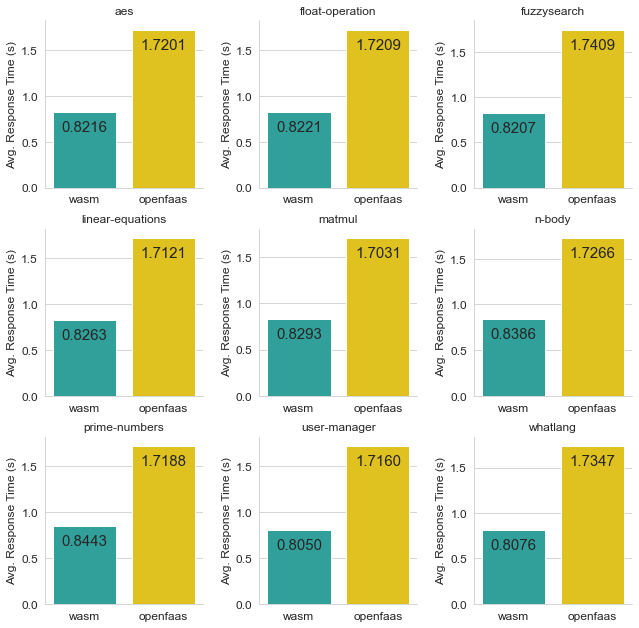

In [38]:
deployment_time_avg_bar_plot = sns.FacetGrid(df_deployment_time_all, col="test_name", hue='batch', col_wrap=3, sharey=False, palette=['lightseagreen', 'gold', 'darkorange'],
                                                  sharex=False)
deployment_time_avg_bar_plot = deployment_time_avg_bar_plot.map(sns.barplot, 'batch', 'init_time',
                                                                          order=['wasm', 'openfaas'], errwidth=0)
deployment_time_avg_bar_plot.set_titles('{col_name}', size=12)
deployment_time_avg_bar_plot.fig.tight_layout(w_pad=3)
for ax in deployment_time_avg_bar_plot.axes.ravel():
    ax.set_ylabel('Avg. Response Time (s)', fontsize=12)
    ax.set_xlabel('')
    ax.tick_params(labelsize=12)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                    va='center', xytext=(0, -15), textcoords='offset points', fontsize=15)
plt.show()

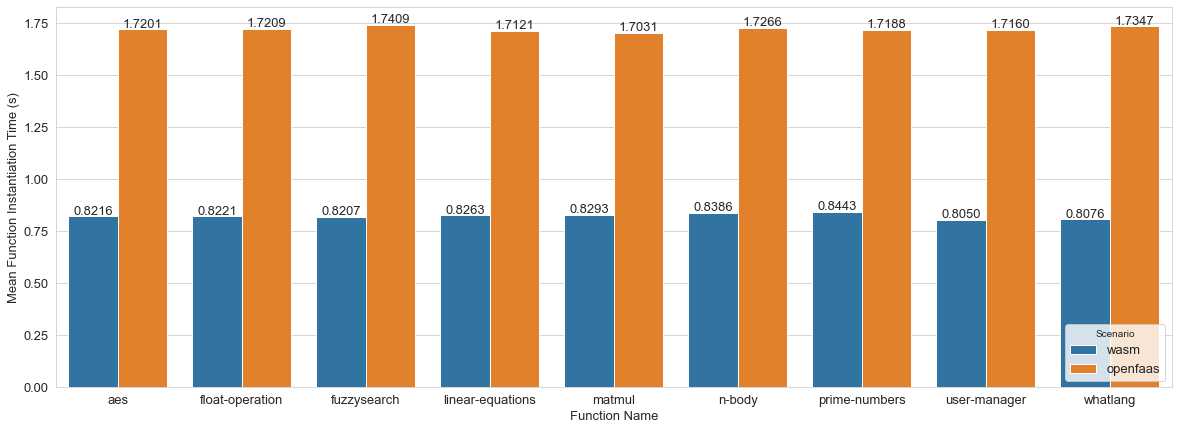

In [39]:
fig = plt.figure(figsize=(20,7))
pl4 = sns.barplot(data=df_deployment_time_all, y="init_time", x="test_name", hue='batch',errorbar=None)

pl4.set_xlabel('Function Name', fontsize=13)
pl4.set_ylabel('Mean Function Instantiation Time (s)', fontsize=13)
pl4.tick_params(labelsize=13)
pl4.legend(title='Scenario', fontsize=13, loc='lower right')



for ax in pl4.patches:
    pl4.annotate(format(ax.get_height(), '.4f'), (ax.get_x() + ax.get_width() / 2., ax.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize=13)

fig = pl4.get_figure()
fig.savefig('images/03-function-instantiation-time.png', bbox_inches='tight', dpi=300)

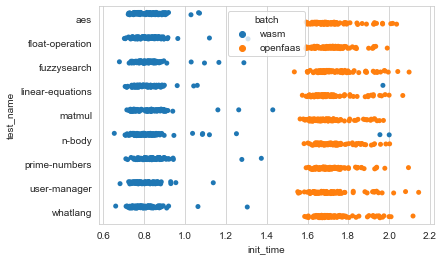

In [40]:
bplot4 = sns.stripplot(data=df_deployment_time_all, y='test_name', x='init_time', hue='batch', dodge=True, jitter=True)

In [41]:
for test in TEST_NAMES:
    tmp_std_wasm = df_deployment_time_all[(df_deployment_time_all.test_name == test) & (df_deployment_time_all.batch=='wasm')]['init_time'].std()
    tmp_std_openfaas = df_deployment_time_all[(df_deployment_time_all.test_name == test) & (df_deployment_time_all.batch=='openfaas')]['init_time'].std()
    print(f'STD - [{test}] wasm <= openfaas: {tmp_std_wasm<=tmp_std_openfaas}, {round(tmp_std_wasm,4)}<={round(tmp_std_openfaas,4)}')

STD - [aes] wasm <= openfaas: True, 0.069<=0.0977
STD - [float-operation] wasm <= openfaas: False, 0.0776<=0.0776
STD - [fuzzysearch] wasm <= openfaas: True, 0.0821<=0.1059
STD - [linear-equations] wasm <= openfaas: False, 0.1301<=0.0987
STD - [matmul] wasm <= openfaas: False, 0.1011<=0.0952
STD - [n-body] wasm <= openfaas: False, 0.1848<=0.0861
STD - [prime-numbers] wasm <= openfaas: False, 0.086<=0.0856
STD - [user-manager] wasm <= openfaas: True, 0.06<=0.1116
STD - [whatlang] wasm <= openfaas: True, 0.0761<=0.1067


## Image Sizes

In [42]:
image_sizes_all = {'test': ['aes', 'float-operation', 'fuzzysearch', 'linear-equations','matmul','n-body','prime-numbers','user-manager','whatlang',
                            'aes', 'float-operation', 'fuzzysearch', 'linear-equations','matmul','n-body','prime-numbers','user-manager','whatlang'],
                   'environment': ['wasm','wasm','wasm','wasm','wasm','wasm','wasm','wasm','wasm','openfaas','openfaas','openfaas','openfaas','openfaas','openfaas','openfaas','openfaas','openfaas'], 'image_size': [131.73, 122.23, 711.96, 160.96, 134.25, 561.83, 674.51, 733.03, 752.79, 8780,
                                    8790, 52620, 8920, 8850, 50970, 50950, 52500, 51040]}
image_sizes_all = pd.DataFrame(image_sizes_all)
image_sizes_all

,test,environment,image_size
0,aes,wasm,131.73
1,float-operation,wasm,122.23
2,fuzzysearch,wasm,711.96
3,linear-equations,wasm,160.96
4,matmul,wasm,134.25
5,n-body,wasm,561.83
6,prime-numbers,wasm,674.51
7,user-manager,wasm,733.03
8,whatlang,wasm,752.79
9,aes,openfaas,8780.00
